<a href="https://colab.research.google.com/github/imranrahman1997/30-days_30-projects/blob/main/project_(4)_Natural%20Language%20Processing%20with%20Disaster%20Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We need to  build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/content/drive/MyDrive/30 days projects/project_4/train.csv")
test = pd.read_csv("/content/drive/MyDrive/30 days projects/project_4/test.csv")

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [5]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
train.drop(['location'], axis = 1, inplace = True)

In [8]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [9]:
test.drop(['location'], axis = 1, inplace = True)

In [10]:
train['keyword'].fillna('', inplace = True)
test['keyword'].fillna('', inplace = True)

In [11]:
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

id         0
keyword    0
text       0
target     0
dtype: int64 

id         0
keyword    0
text       0
dtype: int64


Now let's combine both keyword and text 

In [12]:
train['text'] = train['text'] + ' ' + train['keyword']
test['text'] = test['text'] + ' ' + test['keyword']

In [13]:
train.shape

(7613, 4)

In [14]:
train.drop(['keyword'], axis = 1, inplace = True)
test.drop(['keyword'], axis = 1, inplace = True)

Let's check the duplicates record

In [15]:
duplicate = train[train.duplicated(['text', 'target'], keep = False)]
duplicate.head()

,id,text,target
40,59,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
48,68,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
106,156,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
115,165,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
118,171,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0


In [16]:
train.drop_duplicates(subset = ['text', 'target'], keep = 'first', inplace = True)

let's check agian if their any remaining duplicats in text columns

In [17]:
duplicates_col = train[train.duplicated(['text'], keep = False)]
duplicates_col.head()

,id,text,target
610,881,To fight bioterrorism sir. bioterrorism,1
624,898,To fight bioterrorism sir. bioterrorism,0
2830,4068,.POTUS #StrategicPatience is a strategy for #G...,1
2832,4076,.POTUS #StrategicPatience is a strategy for #G...,0
3240,4656,He came to a land which was engulfed in tribal...,0


In [18]:
duplicates_col.shape

(30, 3)

though there are 30 duplicates remain in text columns, we need to drop these duplicates

In [19]:
train.drop_duplicates(subset = ['text'], keep = 'first', inplace = True)

In [20]:
train.shape

(7526, 3)

Now we need to remove commoner morphological, inflexional endings and some words which does not have much meaning in english words

In [21]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    
    text = [PorterStemmer().stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [23]:
train['text'] = train['text'].apply(lambda x: preprocess(x))
test['text'] = test['text'].apply(lambda x: preprocess(x))

In [24]:
train.head()

,id,text,target
0,1,deed reason earthquak may allah forgiv us,1
1,4,forest fire near la rong sask canada,1
2,5,resid ask shelter place notifi offic evacu she...,1
3,6,peopl receiv wildfir evacu order california,1
4,7,got sent photo rubi alaska smoke wildfir pour ...,1


In [25]:
voc_size = 50000
max_length = 20
embedding_dim = 300


In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = voc_size)
tokenizer.fit_on_texts(train['text'])
sequences = tokenizer.texts_to_sequences(train['text'])

In [27]:
sequences

[[4013, 503, 138, 146, 1710, 3183, 75],
 [99, 3, 304, 552, 5743, 5744, 1065],
 [1398, 553, 1711, 461, 5745, 329, 15, 1711, 461, 393, 473],
 [31, 2634, 106, 15, 393, 93],
 [107, 1066, 239, 4014, 1529, 147, 106, 2635, 220],
 [2636, 310, 93, 1223, 406, 813, 516, 905, 410, 3, 4015, 106],
 [10, 11, 712, 283, 114, 713, 10, 490, 5746, 906, 960, 294],
 [300, 1148, 85, 3, 1915],
 [9, 15, 311, 13, 744, 490],
 [2211, 201, 88, 294],
 [504, 31, 168, 163, 111, 554],
 [745, 491, 2637, 8, 10, 3184, 407, 429, 110, 491, 2637, 376, 376, 5747, 10],
 [283, 10, 1399, 5748, 2637, 51, 604, 3185],
 [10, 4016, 814, 746, 4016],
 [108, 220, 387, 2638, 100, 16, 284],
 [101],
 [61, 1530],
 [369, 61],
 [100, 625],
 [5749],
 [2212],
 [859, 462],
 [61, 3186],
 [535, 51],
 [5750],
 [148, 1224, 312],
 [1149, 155, 356],
 [61, 1916],
 [5751],
 [4, 4017],
 [275],
 [5752, 2213, 362, 261, 2, 1, 5753, 71, 261],
 [357, 262, 605, 712, 1067, 109, 2, 1, 5754, 102, 5755, 261],
 [5756, 284, 26, 2214, 606, 263, 261, 961, 2, 1, 5757,

In [28]:
data = pad_sequences(sequences, maxlen = max_length)

In [29]:
data

array([[    0,     0,     0, ...,  1710,  3183,    75],
       [    0,     0,     0, ...,  5743,  5744,  1065],
       [    0,     0,     0, ...,   461,   393,   473],
       ...,
       [    0,     0,     0, ...,     1,  5718,  5719],
       [    0,     0,     0, ...,   136,   942,    50],
       [    0,     0,     0, ...,     1, 18888, 18889]], dtype=int32)

In [30]:
x_train = data

In [31]:
y_train = train['target']

In [32]:
test.columns

Index(['id', 'text'], dtype='object')

In [33]:
test.head()

,id,text
0,0,happen terribl car crash
1,2,heard earthquak differ citi stay safe everyon
2,3,forest fire spot pond gees flee across street ...
3,9,apocalyps light spokan wildfir
4,11,typhoon soudelor kill china taiwan


In [34]:
x_test = test['text']

In [35]:
tokenizer.fit_on_texts(test['text'])
sequences2 = tokenizer.texts_to_sequences(test['text'])

In [36]:
data2 = pad_sequences(sequences2, maxlen = max_length)

In [37]:
x_test = data2

In [38]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(7526, 20) (7526,)
(3263, 20)


Let's build our RNN model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
model = Sequential()

model.add(Embedding(voc_size, embedding_dim, input_length = max_length))

model.add(LSTM(64, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(64))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Activation ('softmax'))
model.add(Dense(1, activation  = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 300)           15000000  
_________________________________________________________________
lstm (LSTM)                  (None, 20, 64)            93440     
_________________________________________________________________
dropout (Dropout)            (None, 20, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation (Activation)      (None, 64)                0

In [41]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [42]:
history = model.fit(
    x_train, 
    y_train,
    validation_split = 0.2,
    batch_size = 64,
    epochs = 20,
    shuffle = True
)

Epoch 1/20
95/95 [==============================] - 21s 175ms/step - loss: 0.6794 - accuracy: 0.5839 - val_loss: 0.6069 - val_accuracy: 0.7942
Epoch 2/20
95/95 [==============================] - 15s 160ms/step - loss: 0.5653 - accuracy: 0.8550 - val_loss: 0.5820 - val_accuracy: 0.7822
Epoch 3/20
95/95 [==============================] - 15s 160ms/step - loss: 0.5099 - accuracy: 0.8973 - val_loss: 0.5593 - val_accuracy: 0.7875
Epoch 4/20
95/95 [==============================] - 15s 158ms/step - loss: 0.4630 - accuracy: 0.9242 - val_loss: 0.5548 - val_accuracy: 0.7769
Epoch 5/20
95/95 [==============================] - 15s 160ms/step - loss: 0.4292 - accuracy: 0.9354 - val_loss: 0.5515 - val_accuracy: 0.7643
Epoch 6/20
95/95 [==============================] - 15s 159ms/step - loss: 0.4054 - accuracy: 0.9350 - val_loss: 0.5608 - val_accuracy: 0.7457
Epoch 7/20
95/95 [==============================] - 15s 160ms/step - loss: 0.3787 - accuracy: 0.9432 - val_loss: 0.5529 - val_accuracy: 0.7510

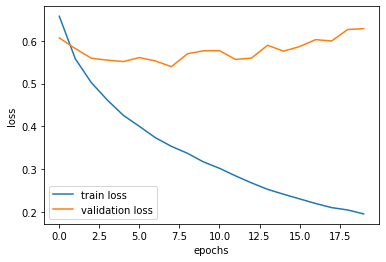

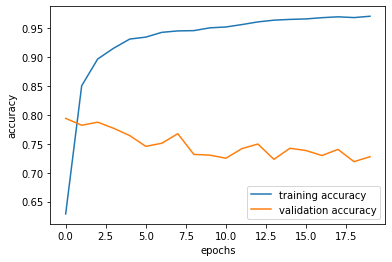

In [43]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.show()

In [44]:
prediction = model.predict(x_test)
prediction

array([[0.11628915],
       [0.11628915],
       [0.8587147 ],
       ...,
       [0.8586493 ],
       [0.6310112 ],
       [0.11628912]], dtype=float32)

In [45]:
prediction = list(1 if x > 0.5 else 0 for x in list(prediction))

In [ ]:
prediction